<!-- ## Analyze single `trx.mat` file to generate analyzed HDF5 file required for plotting -->

## Analysis of a single `trx.mat` file of an experiment

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import datetime

# Set matplotlib style
%matplotlib widget
%load_ext autoreload
%autoreload 2
plt.style.use('../anemotaxis.mplstyle')

In [2]:
import core.data_loader as data_loader
import core.data_processor as data_processor
import viz.plot_data as plot_data
import utils.preprocessing as preprocessing

In [ ]:
# Control FCF_attP2-40@UAS_TNT_2_0003
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_150958/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240223_112627/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240226_145653/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240226_163646/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_105819/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_121446/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240304_151714/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240304_162010/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240308_104430/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240308_124423/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250711_112928/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250712_115018/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250712_131147/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250715_112915/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250801_111753/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250804_110703/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250805_103511/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250908_135226/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250908_140738/trx.mat"

# Control Abby
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/FCF_attP2-40@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250624_143316/trx_20250624_143316.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/FCF_attP2-40@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250620_144253/trx_20250620_144253.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/FCF_attP2-40@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250626_142647/trx_20250626_142647.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/FCF_attP2-40@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250908_135226/trx_20250908_135226.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/FCF_attP2-40@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250908_140738/trx_20250908_140738.mat"

# SS01948 : 
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240223_110610/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240226_160620/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_114359/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240304_153212/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240308_115957/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250620_114411/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250801_113341/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250804_120639/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250805_110603/trx.mat"

# MB143B
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240226_152833/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_112859/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240304_143024/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240308_131239/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240614_150918/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250711_115827/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250712_124448/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250715_115737/trx.mat"

# SS00864
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_151622/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240223_122519/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240226_162227/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_115953/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240304_144626/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240308_123028/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250606_151520/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250610_151515/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250613_115904/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250616_112805/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250801_121925/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250802_125236/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250804_113758/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250805_113429/trx.mat"

# SS01696
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_155844/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240223_115010/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240226_170838/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_111323/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240304_141357/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240308_125815/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250711_122648/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250712_121626/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250715_110237/trx.mat"

# SS01757
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01757@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_145347/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01757@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240223_120812/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01757@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240226_165304/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01757@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_104205/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01757@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240304_150157/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01757@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240308_121454/trx.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/GMR_SS01757@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20250627_112155/trx.mat"



# SS01632
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/GMR_SS01632@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250620_150116/trx_20250620_150116.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/GMR_SS01632@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250624_151833/trx_20250624_151833.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/GMR_SS01632@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250626_144339/trx_20250626_144339.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/GMR_SS01632@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250908_142208/trx_20250908_142208.mat"
# single_path = "/Users/sharbat/Projects/anemotaxis/data/T2_Ladder_Neuron_Data/GMR_SS01632@UAS_TNT_2_0003_p_5gradient2/p_5gradient2_2s1x600s0s#n#n#n/20250908_143537/trx_20250908_143537.mat"


# 

trx_data = data_loader.load_single_trx_file(single_path, show_progress=True)


Processing file: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/trx.mat
Number of larvae: 65


Processing larvae:   0%|          | 0/65 [00:00<?, ?it/s]

In [4]:
# Get the parent directory of single_path and create analyses folder if it doesn't exist
# this is to save analysis results and figures if needed
parent_dir = os.path.dirname(single_path)
output_dir = os.path.join(parent_dir, 'analyses')
os.makedirs(output_dir, exist_ok=True)

<!-- ## Ethogram (unfiltered)
1. Run - black
2. Cast - Red
3. Stop - Green
4. Hunch - Blue
5. Backup - Cyan
6. Roll - Yellow -->

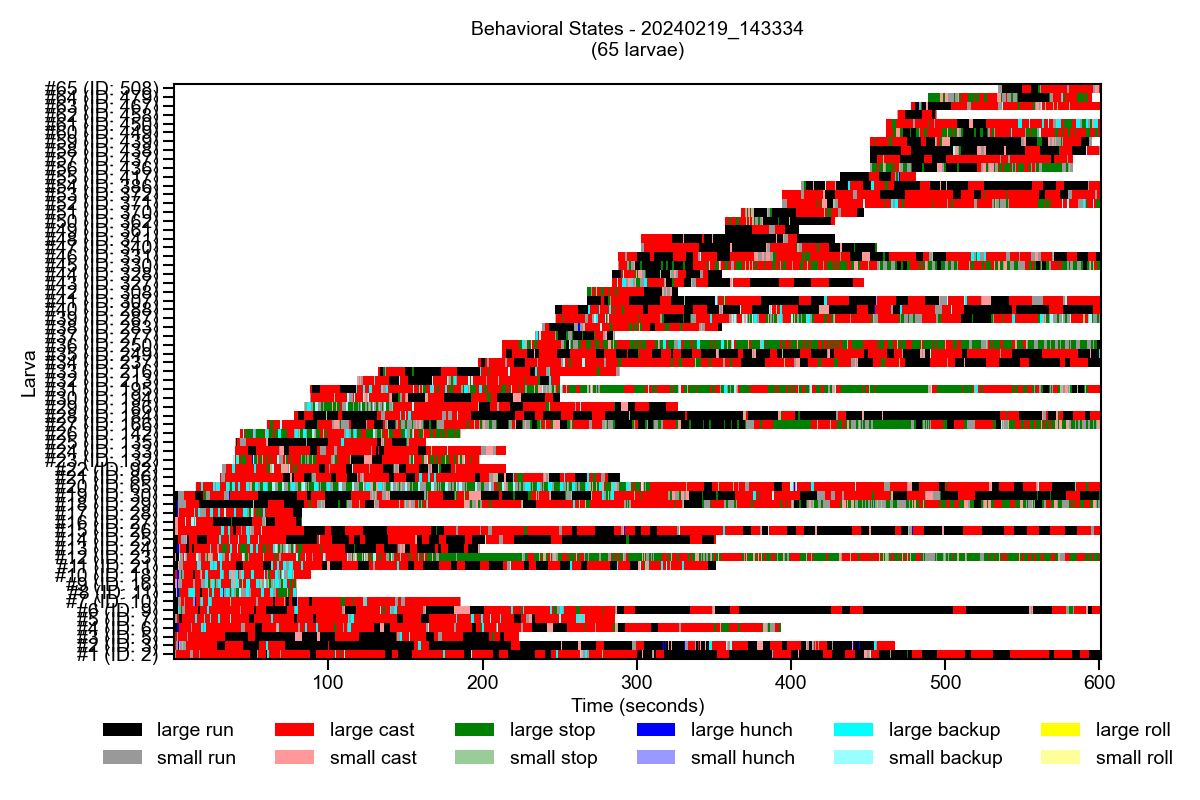

In [5]:
results_behavior_matrix = plot_data.plot_global_behavior_matrix(trx_data)

Duration filtering results (threshold: 300.0s):
  - Removed 44 larvae with <300.0s total duration
  - 21 larvae remaining


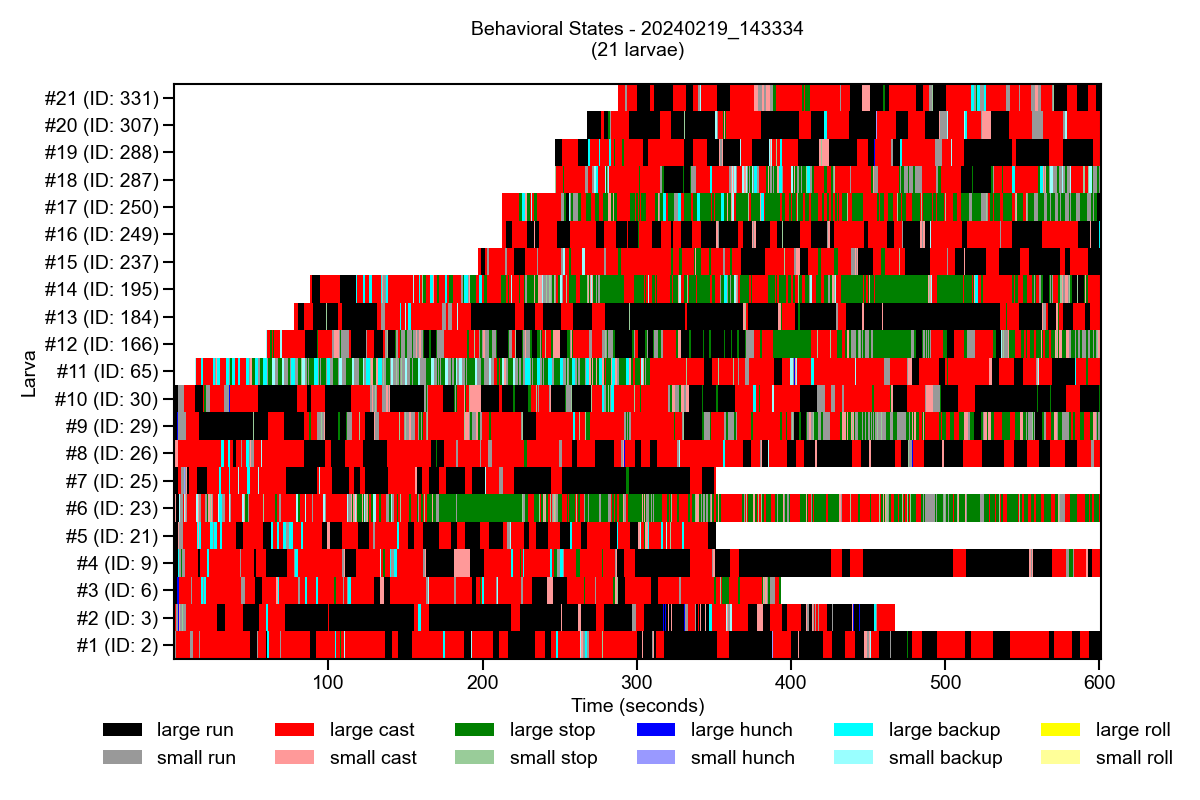

In [6]:
min_total_duration= 300 # seconds (total duration of experiment for anemotaxis is 600 seconds)
trx_filtered_by_duration = preprocessing.filter_larvae_by_duration(trx_data, min_total_duration=min_total_duration)
results_filtered_behavior_matrix = plot_data.plot_global_behavior_matrix(trx_filtered_by_duration)

Excess stop time filtering results (threshold: 50%):
  - Removed 1 larvae with >50% time in stop state
  - 20 larvae remaining


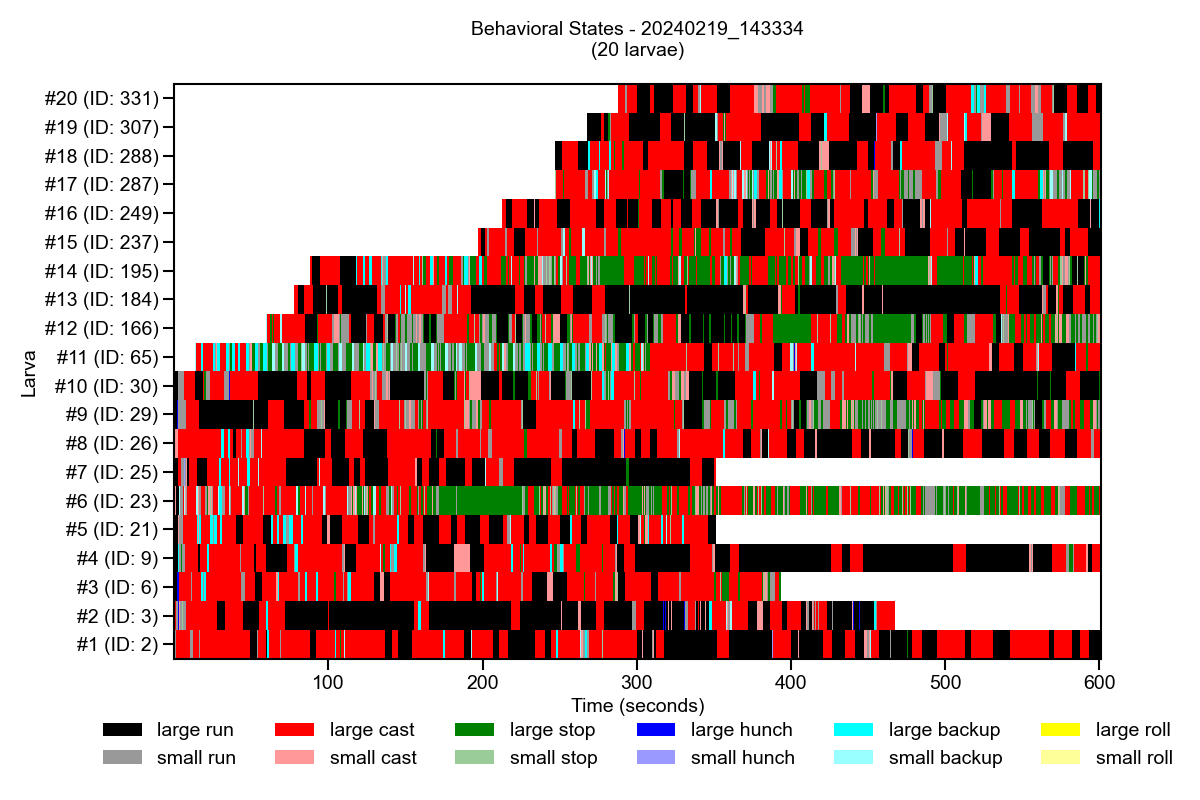

In [7]:
max_stop_percentage = 0.5
trx_filtered_by_removing_stops = preprocessing.filter_larvae_by_excess_stop_time(trx_filtered_by_duration, max_stop_percentage=max_stop_percentage)
results_filtered_behavior_matrix = plot_data.plot_global_behavior_matrix(trx_filtered_by_removing_stops)

Merged 506 sequences with short stops:
  - 225 cast-stop-cast sequences
  - 219 run-stop-run sequences
  - 62 mixed sequences (run-stop-cast or cast-stop-run)
Total duration saved: 442.77 seconds


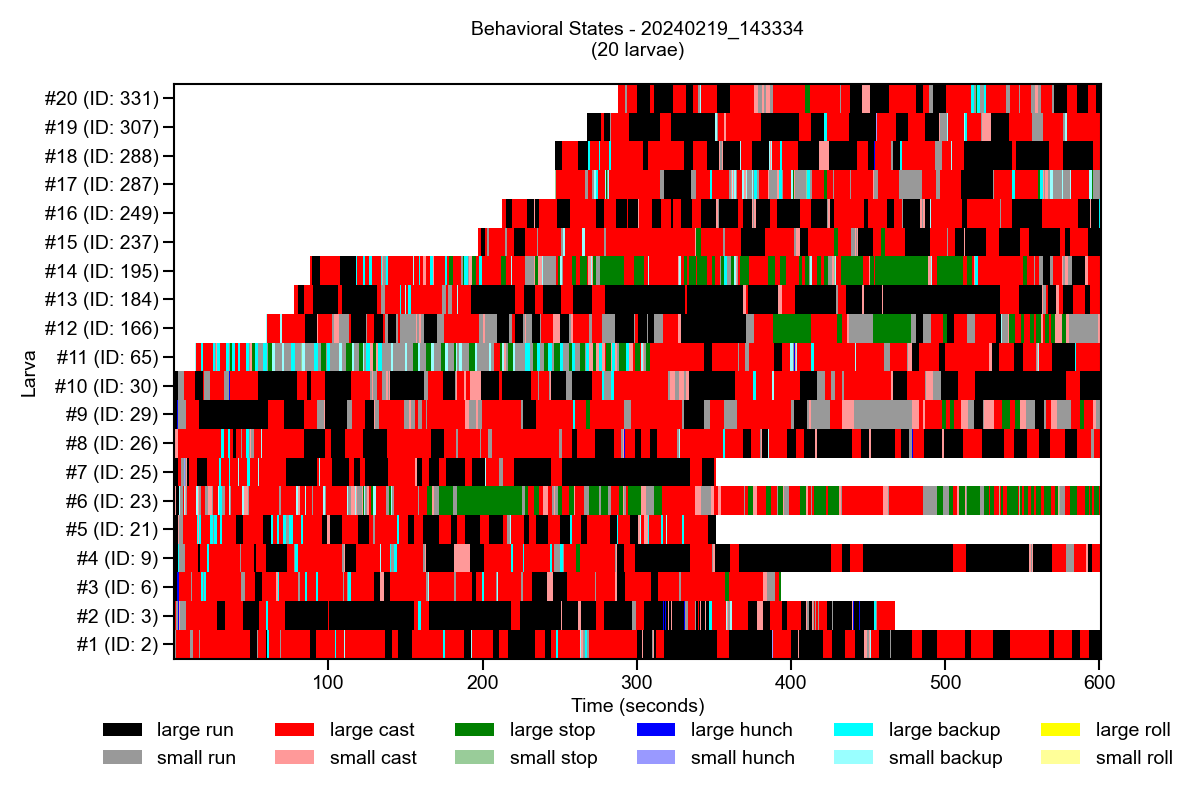

Behavior matrix figure saved to: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/analyses/behavior_matrix_filtered.pdf


In [8]:
trx_filtered_by_merging = preprocessing.merge_short_stop_sequences(trx_filtered_by_removing_stops, min_stop_duration_cast=2.0, min_stop_duration_run=3.0)
results_merged_behavior_matrix = plot_data.plot_global_behavior_matrix(trx_filtered_by_merging)
fig_behavior = plt.gcf()  # Get current figure
fig_behavior.savefig(os.path.join(output_dir, 'behavior_matrix_filtered.pdf'), 
                    bbox_inches='tight', 
                    dpi=300,
                    transparent=True,
                    facecolor='none')
print(f"Behavior matrix figure saved to: {os.path.join(output_dir, 'behavior_matrix_filtered.pdf')}")

<!-- ## Analysis of one single `trx.mat` file -->

In [9]:
# Analyze run probability by orientation and over time
run_prob_results = data_processor.analyze_run_probability_by_orientation(
    trx_filtered_by_merging, bin_width=10, sigma=2)
    
run_prob_time_results = data_processor.analyze_run_probability_over_time(
    trx_filtered_by_merging, window=60, step=20
)

# Analyze turn probability by orientation and over time
turn_prob_results = data_processor.analyze_turn_probability_by_orientation(
    trx_filtered_by_merging, bin_width=10, sigma=2, min_turn_amplitude=45)
turn_prob_time_results = data_processor.analyze_turn_probability_over_time(
    trx_filtered_by_merging, window=60, step=20, min_turn_amplitude=45
)

# Analyze backup probability by orientation and over time
backup_prob_results = data_processor.analyze_backup_probability_by_orientation(
    trx_filtered_by_merging, bin_width=10, sigma=2)
backup_prob_time_results = data_processor.analyze_backup_probability_over_time(
    trx_filtered_by_merging, window=60, step=20)



🐛 Larva 2 cast orientations:
   cast  1: t=   1.1-  2.3s, θ=   5.0°→  11.0° (Δ=  +6.1°)
   TURN  2: t=   2.8- 10.5s, θ=  11.5°→  70.8° (Δ= +59.4°)
   cast  3: t=  12.1- 16.3s, θ=  82.2°→  51.4° (Δ= -30.8°)
   TURN  4: t=  16.9- 49.0s, θ=  47.4°→ -73.0° (Δ=-120.4°)
   cast  5: t=  54.3- 59.5s, θ= -42.2°→ -30.5° (Δ= +11.7°)
   TURN  6: t=  61.4- 68.7s, θ= -19.1°→ -84.8° (Δ= -65.7°)
   TURN  7: t=  69.5- 87.8s, θ= -87.6°→  58.0° (Δ=+145.6°)
   cast  8: t=  91.8-104.3s, θ=  82.4°→  75.3° (Δ=  -7.1°)
   cast  9: t= 105.2-110.2s, θ=  77.1°→  86.9° (Δ=  +9.8°)
   TURN 10: t= 110.7-136.4s, θ=  83.5°→-103.0° (Δ=+173.5°)
   cast 11: t= 141.2-145.3s, θ= -75.4°→ -52.0° (Δ= +23.4°)
   cast 12: t= 154.3-174.5s, θ= -28.5°→ -30.5° (Δ=  -2.0°)
   TURN 13: t= 175.5-187.9s, θ= -29.2°→  96.1° (Δ=+125.2°)
   TURN 14: t= 193.2-206.5s, θ= 113.5°→  34.6° (Δ= -79.0°)
   cast 15: t= 210.4-216.6s, θ=  29.7°→  -6.0° (Δ= -35.6°)
   cast 16: t= 233.7-240.6s, θ=  -6.6°→ -46.7° (Δ= -40.1°)
   cast 17: t= 244.2-247.3

Saved to: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/analyses


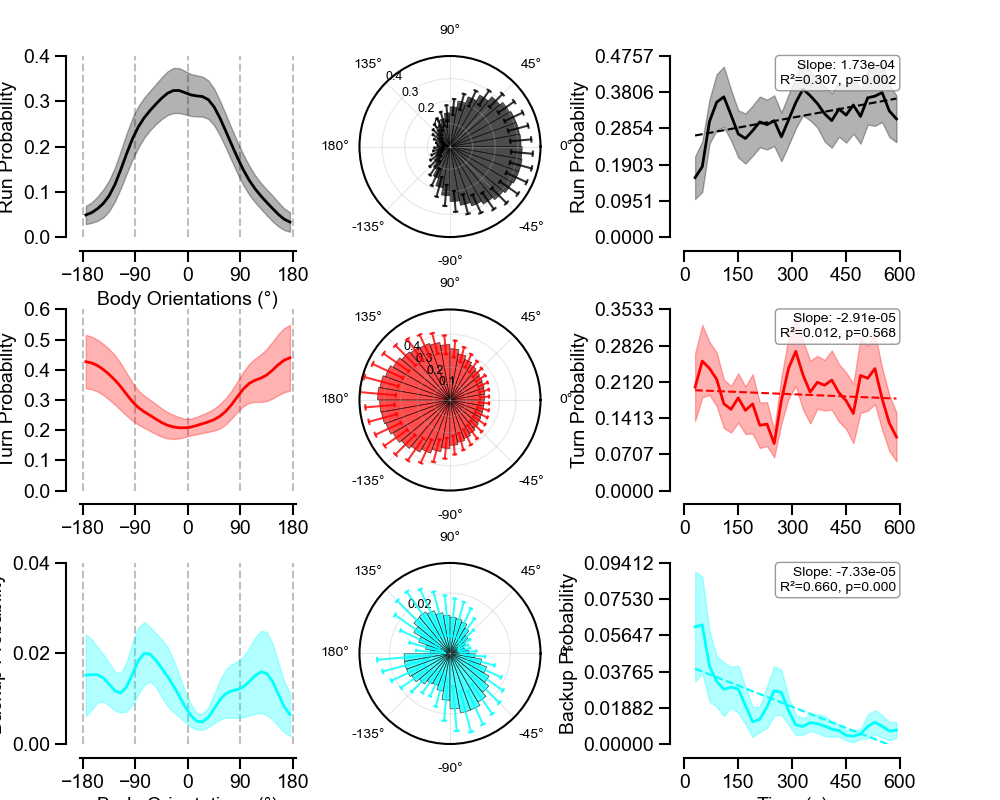

In [10]:
# Create figure with asymmetric spacing - polar plots closer to left
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(3, 3, figure=fig, 
              left=0.08, right=0.90,
              top=0.93, bottom=0.07,
              wspace=0.4,               # Reduced overall spacing
              hspace=0.4,
              width_ratios=[0.6, 0.6, 0.6])  # Left wide, middle narrow, right wide

# Row 1: Run analysis
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], projection='polar')
ax7 = fig.add_subplot(gs[0, 2])


plot_data.plot_orientation_histogram(run_prob_results, plot_type='run', ax = ax1)
plot_data.plot_orientation_histogram_polar(run_prob_results, plot_type='run', ax=ax2, bar_style=True, tick_fontsize=10)
ax2_pos = ax2.get_position()
ax2.set_position([ax2_pos.x0 - 0.04, ax2_pos.y0, ax2_pos.width, ax2_pos.height])


plot_data.plot_metric_over_time(run_prob_time_results, plot_type='run', ax=ax7, show_xlabel=False)


# Row 2: Turn analysis
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1], projection='polar')
ax8 = fig.add_subplot(gs[1, 2])

plot_data.plot_orientation_histogram(turn_prob_results, plot_type='turn', ax=ax3, ylabel='Turn Probability', show_xlabel=False)

plot_data.plot_orientation_histogram_polar(turn_prob_results, plot_type='turn', ax=ax4, bar_style=True, tick_fontsize=10)
ax4_pos = ax4.get_position()
ax4.set_position([ax4_pos.x0 - 0.04, ax4_pos.y0, ax4_pos.width, ax4_pos.height])

plot_data.plot_metric_over_time(turn_prob_time_results, plot_type='turn', ax=ax8, show_xlabel=False)

# Row 3: Backup analysis
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1], projection='polar')
ax9 = fig.add_subplot(gs[2, 2])


plot_data.plot_orientation_histogram(backup_prob_results, ax=ax5, ylabel='Backup Probability', color = 'cyan',show_xlabel=True)

plot_data.plot_orientation_histogram_polar(backup_prob_results, plot_type='backup', ax=ax6, bar_style=True, tick_fontsize=10)
ax6_pos = ax6.get_position()
ax6.set_position([ax6_pos.x0 - 0.04, ax6_pos.y0, ax6_pos.width, ax6_pos.height])
plot_data.plot_metric_over_time(backup_prob_time_results, plot_type='backup', ax=ax9, show_xlabel=True)

fig.savefig(os.path.join(output_dir, 'behavioral_analysis_summary.pdf'), 
            bbox_inches='tight', 
            dpi=300,
            transparent=True,      # Transparent background
            facecolor='none')      # No face color

print(f"Saved to: {output_dir}")

In [11]:

# Analyze turn amplitude by orientation and over time
turn_amp_results = data_processor.analyze_turn_amplitudes_by_orientation(
    trx_filtered_by_merging, bin_width=20, sigma=0.1, min_turn_amplitude=45
)
turn_amp_time_results = data_processor.analyze_turn_amplitudes_over_time(
    trx_filtered_by_merging, window=60, step=20, min_turn_amplitude=45
)


# Analyze run velocity by orientation and over time
velocity_results = data_processor.analyze_run_velocity_by_orientation(
    trx_filtered_by_merging, bin_width=15, sigma=2
)

velocity_results_pooled = data_processor.analyze_run_velocity_by_orientation_pooled(
    trx_filtered_by_merging, bin_width=15, sigma=2
)
velocity_time_results = data_processor.analyze_run_velocity_over_time(
    trx_filtered_by_merging, window=60, step=20
)

/Users/sharbat/Projects/anemotaxis/src/core/data_processor.py:1023: RuntimeWarning: Mean of empty slice
  mean_hist = np.nanmean(hist_arrays, axis=0)
/Users/sharbat/Projects/anemotaxis/src/core/data_processor.py:1024: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  se_hist = stats.sem(hist_arrays, axis=0, nan_policy='omit')


Combined velocity & amplitude figure saved to: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/analyses/velocity_amplitude_analysis.pdf


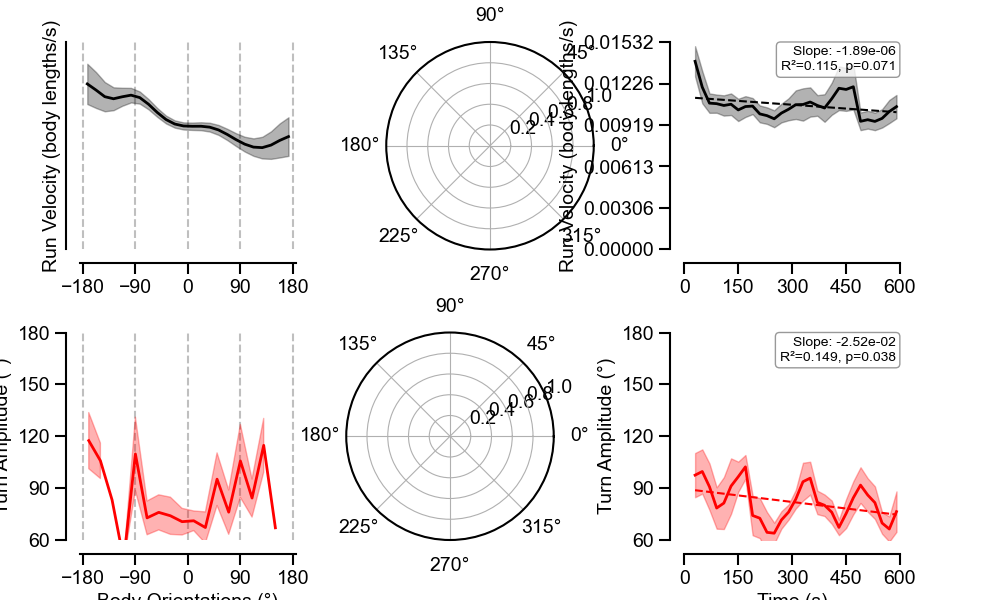

In [12]:
# Create combined figure with asymmetric spacing - polar plots closer to left
fig_combined = plt.figure(figsize=(10, 6))
gs_combined = GridSpec(2, 3, figure=fig_combined, 
                      left=0.08, right=0.90,
                      top=0.93, bottom=0.10,
                      wspace=0.4,               # Reduced overall spacing
                      hspace=0.4,
                      width_ratios=[0.6, 0.6, 0.6])  # Left wide, middle narrow, right wide

# Row 1: Run Velocity Analysis
ax_vel1 = fig_combined.add_subplot(gs_combined[0, 0])
ax_vel2 = fig_combined.add_subplot(gs_combined[0, 1], projection='polar')
ax_vel3 = fig_combined.add_subplot(gs_combined[0, 2])


# Linear plot
plot_data.plot_orientation_histogram(velocity_results_pooled, ax=ax_vel1, show_xlabel=False, ylabel='Run Velocity (body lengths/s)')
ax_vel1.set_ylim(0.005,0.015)
# ax_vel1_y_ticks = [0.01, 0.011, 0.012, 0.013, 0.014]
# ax_vel1.set_yticks(ax_vel1_y_ticks)

# Polar plot
# plot_data.plot_orientation_histogram_polar(velocity_results_pooled, ax=ax_vel2, bar_style=True, tick_fontsize=10)
# ax_vel2_pos = ax_vel2.get_position()
# ax_vel2.set_position([ax_vel2_pos.x0 - 0.04, ax_vel2_pos.y0, ax_vel2_pos.width, ax_vel2_pos.height])

# Time series plot
plot_data.plot_metric_over_time(
    velocity_time_results, color = 'black',ylabel='Run Velocity (body lengths/s)',
    show_individuals=False, show_error=True, ax=ax_vel3, show_xlabel=False
)

# Row 2: Turn Amplitude Analysis
ax_amp1 = fig_combined.add_subplot(gs_combined[1, 0])
ax_amp2 = fig_combined.add_subplot(gs_combined[1, 1], projection='polar')
ax_amp3 = fig_combined.add_subplot(gs_combined[1, 2])

# Set minimum amplitude
min_amp = 60

# Check if we have ANY valid (non-NaN) data
if turn_amp_results and 'mean_hist' in turn_amp_results:
    mean_hist = np.array(turn_amp_results['mean_hist'])
    has_data = np.any(~np.isnan(mean_hist))
else:
    has_data = False


# Linear plot
plot_data.plot_orientation_histogram(turn_amp_results, ax=ax_amp1, ylabel='Turn Amplitude (°)', 
                                     show_xlabel=True, min_amplitude=min_amp, plot_type='turn_amplitude')

# Polar plot - only if there's valid data
# plot_data.plot_orientation_histogram_polar(turn_amp_results, ax=ax_amp2, bar_style=True, 
#                                     tick_fontsize=10, min_amplitude=min_amp, plot_type='turn_amplitude')
ax_amp2_pos = ax_amp2.get_position()
ax_amp2.set_position([ax_amp2_pos.x0 - 0.04, ax_amp2_pos.y0, ax_amp2_pos.width, ax_amp2_pos.height])

# Time series plot
plot_data.plot_metric_over_time(
    turn_amp_time_results, plot_type='turn_amplitude', 
    show_individuals=False, show_error=True, ax=ax_amp3, show_xlabel=True,
    min_amplitude=min_amp
)


# Save the combined figure
fig_combined.savefig(os.path.join(output_dir, 'velocity_amplitude_analysis.pdf'), 
                    bbox_inches='tight', 
                    dpi=300,
                    transparent=True,
                    facecolor='none')
print(f"Combined velocity & amplitude figure saved to: {os.path.join(output_dir, 'velocity_amplitude_analysis.pdf')}")

plt.show()

🎯 Head Cast Detection Summary (with Turn Detection)
Larva  2: 31 cast periods (13 turns),  63 head casts (20 perpendicular: 10 towards [50.0%], 10 away [50.0%])
Larva  3: 21 cast periods ( 7 turns),  24 head casts ( 8 perpendicular:  2 towards [25.0%],  6 away [75.0%])
Larva  6: 26 cast periods ( 6 turns),  59 head casts ( 6 perpendicular:  1 towards [16.7%],  5 away [83.3%])
Larva  9: 25 cast periods ( 4 turns),  42 head casts ( 9 perpendicular:  4 towards [44.4%],  5 away [55.6%])
Larva 21: 30 cast periods ( 7 turns),  37 head casts (10 perpendicular:  4 towards [40.0%],  6 away [60.0%])
Larva 23: 55 cast periods ( 2 turns),  34 head casts ( 3 perpendicular:  3 towards [100.0%],  0 away [0.0%])
Larva 25: 21 cast periods ( 4 turns),  23 head casts ( 6 perpendicular:  1 towards [16.7%],  5 away [83.3%])
Larva 26: 36 cast periods (10 turns),  66 head casts (10 perpendicular:  4 towards [40.0%],  6 away [60.0%])
Larva 29: 25 cast periods ( 4 turns),  34 head casts ( 6 perpendicular:  4 t

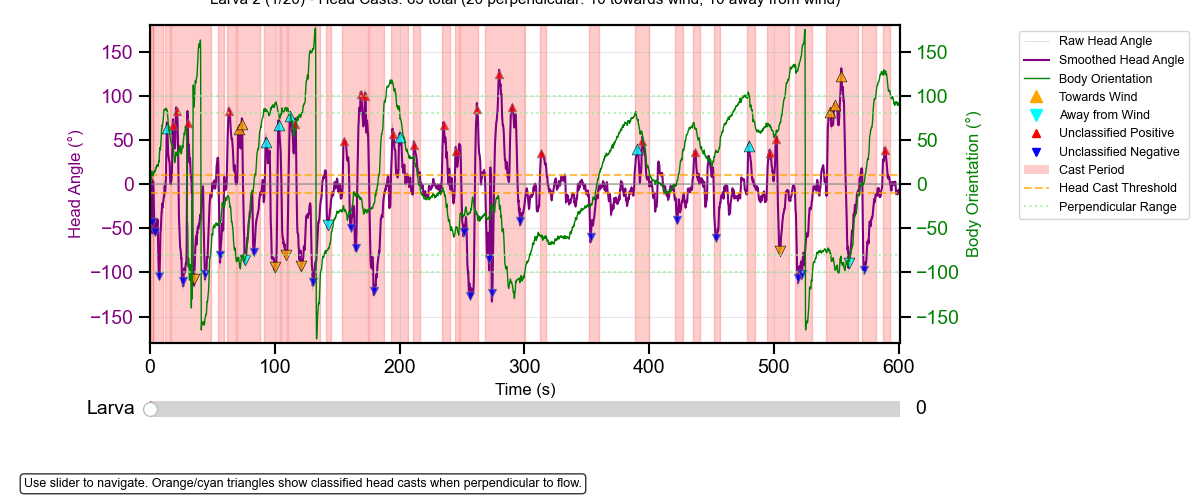

In [13]:
# Detect head casts with new method
cast_events_data = data_processor.detect_head_casts_in_casts(
    trx_filtered_by_merging,
    peak_threshold=10.0,
    peak_prominence=10.0,
    smooth_sigma=10
)

# Plot with individual subplots
fig = plot_data.plot_cast_detection_results(
    trx_filtered_by_merging,
    cast_events_data,
    figsize=(12,5),
    save_path=os.path.join(output_dir, 'cast_detection_all_larvae.pdf'),
    time_range=None  # Full time range
)


🎯 First Head Cast Bias Analysis
Larva  2:  9 first perpendicular head casts ( 3 towards [33.3%],  6 away [66.7%])
Larva  3:  5 first perpendicular head casts ( 2 towards [40.0%],  3 away [60.0%])
Larva  6:  2 first perpendicular head casts ( 0 towards [0.0%],  2 away [100.0%])
Larva  9:  4 first perpendicular head casts ( 3 towards [75.0%],  1 away [25.0%])
Larva 21:  5 first perpendicular head casts ( 1 towards [20.0%],  4 away [80.0%])
Larva 23:  1 first perpendicular head casts ( 1 towards [100.0%],  0 away [0.0%])
Larva 25:  6 first perpendicular head casts ( 1 towards [16.7%],  5 away [83.3%])
Larva 26:  2 first perpendicular head casts ( 1 towards [50.0%],  1 away [50.0%])
Larva 29:  3 first perpendicular head casts ( 2 towards [66.7%],  1 away [33.3%])
Larva 30:  3 first perpendicular head casts ( 1 towards [33.3%],  2 away [66.7%])
Larva 65:  5 first perpendicular head casts ( 1 towards [20.0%],  4 away [80.0%])
Larva 166:  1 first perpendicular head casts ( 0 towards [0.0%], 

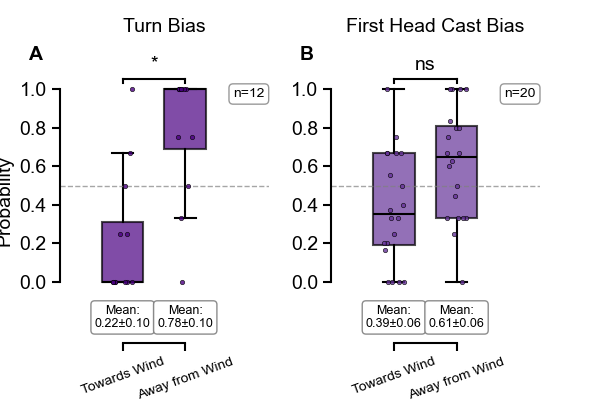

In [23]:
# Analyze first head cast bias
bias_results_first = data_processor.analyze_head_cast_bias(
    cast_events_data, 
    analysis_type='first'
)

# NEW: Analyze turn bias from perpendicular orientations
bias_results_turn = data_processor.analyze_head_cast_bias(
    cast_events_data, 
    analysis_type='turn'
)

# Create 1x2 figure layout for first head cast bias and turn bias only
fig_bias = plt.figure(figsize=(6, 4))  # Reduced width for 2 plots
gs_bias = GridSpec(1, 2, figure=fig_bias, 
                   left=0.10, right=0.90,  # Adjusted margins
                   top=0.85, bottom=0.15,
                   wspace=0.3)  # Spacing for 2 plots

# Plot turn bias (first panel)
ax_bias1 = fig_bias.add_subplot(gs_bias[0, 0])
plot_data.plot_head_cast_bias_perpendicular(
    bias_results_turn,
    ax=ax_bias1,
    title='Turn Bias',
    plot_type='violn'
)
ax_bias1.text(-0.15, 1.05, 'A', transform=ax_bias1.transAxes, 
              fontsize=14, fontweight='bold', va='top', ha='left')

# Plot first head cast bias (second panel)
ax_bias2 = fig_bias.add_subplot(gs_bias[0, 1])
plot_data.plot_head_cast_bias_perpendicular(
    bias_results_first,
    ax=ax_bias2,
    title='First Head Cast Bias',
    plot_type='violn'
)
ax_bias2.text(-0.15, 1.05, 'B', transform=ax_bias2.transAxes, 
              fontsize=14, fontweight='bold', va='top', ha='left')
ax_bias2.set_ylabel('')  # Remove y-label for second plot

# Save the combined figure
fig_bias.savefig(os.path.join(output_dir, 'head_cast_bias_first_and_turn.pdf'), 
                bbox_inches='tight', 
                dpi=300,
                transparent=True,
                facecolor='none')
print(f"First head cast bias and turn bias figure saved to: {os.path.join(output_dir, 'head_cast_bias_first_and_turn.pdf')}")

plt.show()

In [15]:
# # Analyze first head cast bias (POOLED)
# bias_results_first = data_processor.analyze_head_cast_bias_pooled(
#     cast_events_data, 
#     analysis_type='first'
# )

# # Analyze last head cast bias (POOLED)
# bias_results_last = data_processor.analyze_head_cast_bias_pooled(
#     cast_events_data, 
#     analysis_type='last'
# )

# # Analyze all head cast bias (POOLED)
# bias_results_all = data_processor.analyze_head_cast_bias_pooled(
#     cast_events_data, 
#     analysis_type='all'
# )

# # Analyze turn bias from perpendicular orientations (POOLED)
# bias_results_turn = data_processor.analyze_head_cast_bias_pooled(
#     cast_events_data, 
#     analysis_type='turn'
# )

# # Create 1x4 figure layout for all four bias analyses
# fig_bias = plt.figure(figsize=(12, 4))  # Increased width for 4 plots
# gs_bias = GridSpec(1, 4, figure=fig_bias, 
#                    left=0.06, right=0.95,  # Adjusted margins
#                    top=0.85, bottom=0.15,
#                    wspace=0.25)  # Reduced spacing for 4 plots

# # Panel A: Turn bias (first panel)
# ax_bias1 = fig_bias.add_subplot(gs_bias[0, 0])
# plot_data.plot_head_cast_bias_perpendicular(
#     bias_results_turn,
#     ax=ax_bias1,
#     title='Turn Bias (Pooled)'
# )
# ax_bias1.text(-0.15, 1.05, 'A', transform=ax_bias1.transAxes, 
#               fontsize=14, fontweight='bold', va='top', ha='left')

# # Panel B: First head cast bias (second panel)
# ax_bias2 = fig_bias.add_subplot(gs_bias[0, 1])
# plot_data.plot_head_cast_bias_perpendicular(
#     bias_results_first,
#     ax=ax_bias2,
#     title='First Head Cast Bias (Pooled)'
# )
# ax_bias2.text(-0.15, 1.05, 'B', transform=ax_bias2.transAxes, 
#               fontsize=14, fontweight='bold', va='top', ha='left')
# ax_bias2.set_ylabel('')  # Remove y-label for middle plots

# # Panel C: All head cast bias (third panel)
# ax_bias3 = fig_bias.add_subplot(gs_bias[0, 2])
# plot_data.plot_head_cast_bias_perpendicular(
#     bias_results_all,
#     ax=ax_bias3,
#     title='All Head Cast Bias (Pooled)'
# )
# ax_bias3.text(-0.15, 1.05, 'C', transform=ax_bias3.transAxes, 
#               fontsize=14, fontweight='bold', va='top', ha='left')
# ax_bias3.set_ylabel('')  # Remove y-label for middle plots

# # Panel D: Last head cast bias (fourth panel)
# ax_bias4 = fig_bias.add_subplot(gs_bias[0, 3])
# plot_data.plot_head_cast_bias_perpendicular(
#     bias_results_last,
#     ax=ax_bias4,
#     title='Last Head Cast Bias (Pooled)'
# )
# ax_bias4.text(-0.15, 1.05, 'D', transform=ax_bias4.transAxes, 
#               fontsize=14, fontweight='bold', va='top', ha='left')
# ax_bias4.set_ylabel('')  # Remove y-label for rightmost plot

# # Save the combined figure
# fig_bias.savefig(os.path.join(output_dir, 'head_cast_bias_perpendicular_combined_pooled.pdf'), 
#                 bbox_inches='tight', 
#                 dpi=300,
#                 transparent=True,
#                 facecolor='none')
# print(f"Combined head cast bias figure (pooled) saved to: {os.path.join(output_dir, 'head_cast_bias_perpendicular_combined_pooled.pdf')}")

# plt.show()

🎯 Head Cast Detection Summary (with Turn Detection)
Larva  2: 31 cast periods (13 turns),  63 head casts (20 perpendicular: 10 towards [50.0%], 10 away [50.0%])
Larva  3: 21 cast periods ( 7 turns),  24 head casts ( 8 perpendicular:  2 towards [25.0%],  6 away [75.0%])
Larva  6: 26 cast periods ( 6 turns),  59 head casts ( 6 perpendicular:  1 towards [16.7%],  5 away [83.3%])
Larva  9: 25 cast periods ( 4 turns),  42 head casts ( 9 perpendicular:  4 towards [44.4%],  5 away [55.6%])
Larva 21: 30 cast periods ( 7 turns),  37 head casts (10 perpendicular:  4 towards [40.0%],  6 away [60.0%])
Larva 23: 55 cast periods ( 2 turns),  34 head casts ( 3 perpendicular:  3 towards [100.0%],  0 away [0.0%])
Larva 25: 21 cast periods ( 4 turns),  23 head casts ( 6 perpendicular:  1 towards [16.7%],  5 away [83.3%])
Larva 26: 36 cast periods (10 turns),  66 head casts (10 perpendicular:  4 towards [40.0%],  6 away [60.0%])
Larva 29: 25 cast periods ( 4 turns),  34 head casts ( 6 perpendicular:  4 t

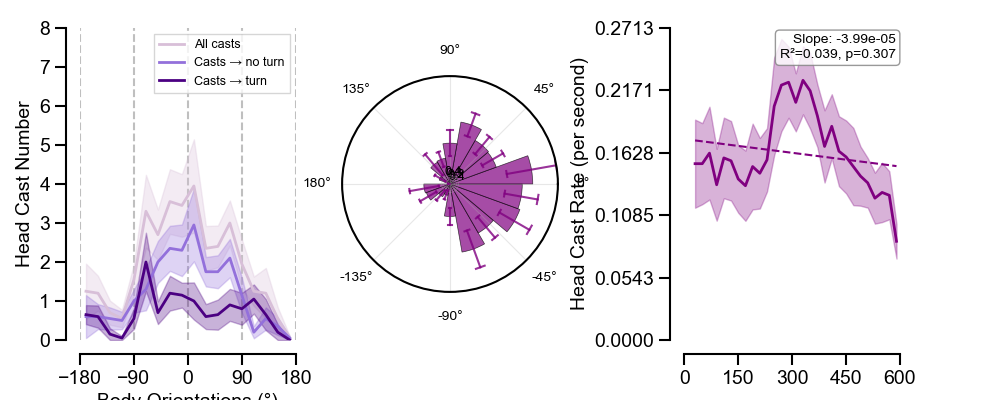

In [16]:
# In your notebook cell, replace the existing head cast analysis with:

# Analyze head casts by cast start orientation - separated by turn success
head_cast_orientation_results = data_processor.analyze_head_casts_by_orientation(
    trx_filtered_by_merging, 
    bin_width=20, 
    peak_threshold=10.0,
    peak_prominence=10.0,
    smooth_sigma=10,
    large_casts_only=True,
    separate_by_turn_success=True,  # NEW PARAMETER
    min_turn_amplitude=45
)

# Create combined figure for head cast analysis
fig_head_casts = plt.figure(figsize=(10, 4))
gs_head_casts = GridSpec(1, 3, figure=fig_head_casts, 
                        left=0.08, right=0.90,
                        top=0.93, bottom=0.15,
                        wspace=0.4,               
                        width_ratios=[0.6, 0.6, 0.6])

# Row 1: Head Cast Analysis
ax_hc1 = fig_head_casts.add_subplot(gs_head_casts[0, 0])
ax_hc2 = fig_head_casts.add_subplot(gs_head_casts[0, 1], projection='polar')
ax_hc3 = fig_head_casts.add_subplot(gs_head_casts[0, 2])

# Linear plot with turn success separation
plot_data.plot_head_cast_orientation_by_turn_success(
    head_cast_orientation_results,
    ax=ax_hc1, 
    show_xlabel=True, 
    ylabel='Head Cast Number',
    ylim=[0,8]
)

# Polar plot (use all casts for polar representation)
plot_data.plot_orientation_histogram_polar(head_cast_orientation_results, 
                                        ax=ax_hc2, 
                                        plot_type='head_cast',
                                        bar_style=True, 
                                        tick_fontsize=10)
ax_hc2_pos = ax_hc2.get_position()
ax_hc2.set_position([ax_hc2_pos.x0 - 0.04, ax_hc2_pos.y0, ax_hc2_pos.width, ax_hc2_pos.height])

# Time series plot (analyze head casts over time - this uses a different function)
head_cast_time_results = data_processor.analyze_head_casts_over_time(
    trx_filtered_by_merging, 
    window=60, 
    step=20,
    peak_threshold=20.0, 
    peak_prominence=3.0,
    smooth_sigma=4.0,
    large_casts_only=True
)

plot_data.plot_metric_over_time(
    head_cast_time_results, plot_type='head_cast', ylabel='Head Cast Rate (per second)',
    show_individuals=False, show_error=True, ax=ax_hc3, show_xlabel=False
)

# Save the head cast analysis figure
fig_head_casts.savefig(os.path.join(output_dir, 'head_cast_analysis_by_turn_success.pdf'), 
                      bbox_inches='tight', 
                      dpi=300,
                      transparent=True,
                      facecolor='none')
print(f"Head cast analysis figure saved to: {os.path.join(output_dir, 'head_cast_analysis_by_turn_success.pdf')}")

plt.show()

Figure saved to /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/analyses/ni_over_time.pdf


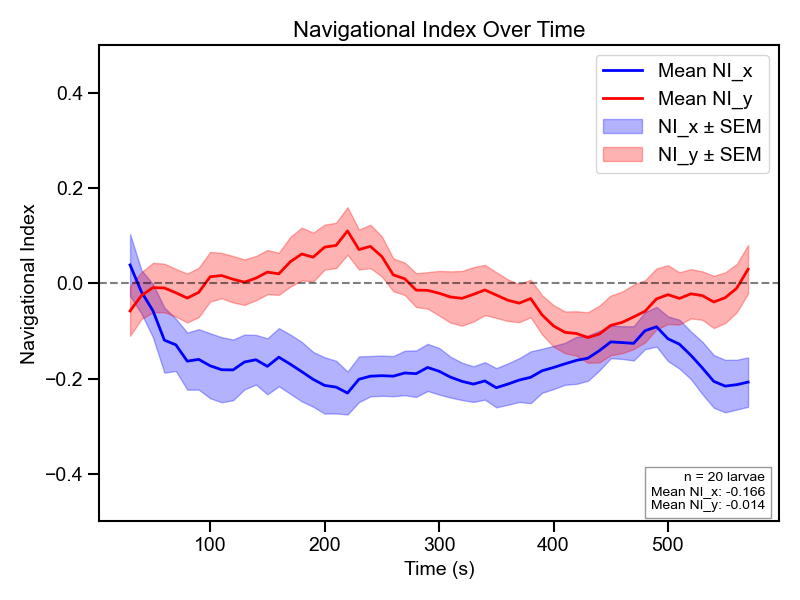

Figure saved to /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/analyses/ni_boxplot.pdf


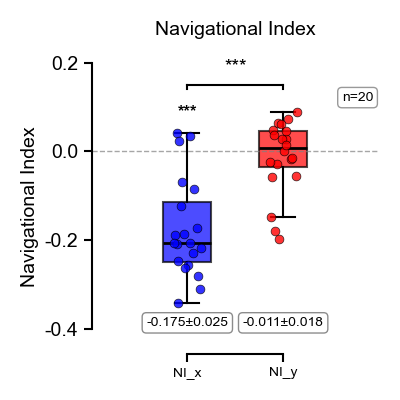


=== NAVIGATIONAL INDEX ANALYSIS ===
Number of larvae: 20
Mean NI_x: -0.175 (p=0.0000, ***)
Mean NI_y: -0.011 (p=0.5384, ns)
Paired comparison NI_x vs NI_y: p=0.0001
RESULT: NI_x and NI_y are significantly different from each other


In [17]:
# 1. Analyze NI over time
ni_time_results = data_processor.analyze_navigational_index_over_time(
    trx_filtered_by_merging, window=60, step=10, t_max=600
)

# 2. Analyze single NI values per larva
ni_single_results = data_processor.analyze_navigational_index_single_values(
    trx_filtered_by_merging, window=60, step=10, t_max=600
)

# 3. Plot time series
fig_time = plot_data.plot_navigational_index_over_time(
    ni_time_results,
    save_path=os.path.join(output_dir, 'ni_over_time.pdf')
)

# 4. Plot box plots
fig_box = plot_data.plot_navigational_index_boxplot(
    ni_single_results,
    save_path=os.path.join(output_dir, 'ni_boxplot.pdf')
)


In [18]:
# In analyze_single_anemotaxis.ipynb, replace the save_analysis_results call with:
saved_file = data_loader.save_analysis_results(
    output_dir,
    single_path,
    trx_filtered_by_merging,
    
    # Orientation-based analyses (consistent naming)
    run_prob_results=run_prob_results,
    turn_prob_results=turn_prob_results,
    turn_amp_results=turn_amp_results,
    backup_prob_results=backup_prob_results,
    velocity_results=velocity_results,
    
    # Time-based analyses (consistent naming)
    run_prob_time_results=run_prob_time_results,
    turn_prob_time_results=turn_prob_time_results,
    turn_amp_time_results=turn_amp_time_results,
    backup_prob_time_results=backup_prob_time_results,
    velocity_time_results=velocity_time_results,
    
    # Head cast analyses
    # cast_events_data=cast_events_data,
    bias_results_first=bias_results_first,
    # bias_results_last=bias_results_last,
    # bias_results_all=bias_results_all,
    bias_results_turn=bias_results_turn,
    head_cast_orientation_results=head_cast_orientation_results,
    head_cast_time_results=head_cast_time_results,

    # NI results
    ni_time_results=ni_time_results,
    ni_single_results=ni_single_results
)

💾 Saving run_prob_results...
💾 Saving turn_prob_results...
💾 Saving turn_amp_results...
💾 Saving backup_prob_results...
💾 Saving velocity_results...
💾 Saving run_prob_time_results...
💾 Saving turn_prob_time_results...
💾 Saving turn_amp_time_results...
💾 Saving backup_prob_time_results...
💾 Saving velocity_time_results...
💾 Saving bias_results_first...
💾 Saving bias_results_turn...
💾 Saving head_cast_orientation_results...
💾 Saving head_cast_time_results...
💾 Saving ni_time_results...
💾 Saving ni_single_results...
📁 Analysis results saved to: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/analyses/analysis_results_20251103_111645.h5


In [19]:
# # Export notebook as PDF
# from nbconvert import PDFExporter
# from IPython.display import Javascript, display
# import time

# # First, save the notebook automatically
# print("💾 Saving notebook...")
# display(Javascript('IPython.notebook.save_notebook()'))
# time.sleep(2)  # Wait for save to complete

# try:
#     # Get the current notebook path
#     notebook_path = "/Users/sharbat/Projects/anemotaxis/scripts/analyze_single_anemotaxis.ipynb"
#     pdf_output_path = os.path.join(output_dir, 'analyze_single_anemotaxis.pdf')
    
#     # Export using nbconvert directly
#     exporter = PDFExporter()
#     (body, resources) = exporter.from_filename(notebook_path)
    
#     with open(pdf_output_path, 'wb') as f:
#         f.write(body)
    
#     print(f"✅ Notebook PDF saved to: {pdf_output_path}")
    
# except Exception as e:
#     print(f"❌ PDF export failed: {e}")
#     print("💡 Alternative: Use Jupyter's File menu > Download as > PDF via LaTeX")